In [1]:
# Data Wrangling II
# Create an “Academic performance” dataset of students and perform the following operations using
# Python.

# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
# inconsistencies, use any of the suitable techniques to deal with them.

# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
# techniques to deal with them.

# 3. Apply data transformations on at least one of the variables. The purpose of this
# transformation should be one of the following reasons: to change the scale for better
# understanding of the variable, to convert a non-linear relation into a linear one, or to
# decrease the skewness and convert the distribution into a normal distribution.

# Reason and document your approach properly.

In [25]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:

# Read the data from the CSV file
data = pd.read_csv('data.csv')

In [27]:
data.head()

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.92,5.06,19
1,827,Seema,Singh,919085484267,0.22,2.83,20
2,566,Pooja,Rao,919692747629,4.00,5.78,20
3,431,Vikram,Trivedi,919289900918,3.93,NaN,20
4,688,Rishi,Nair,918510327681,0.34,3.35,22


In [30]:
# Checking for missing values
data.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            5
CGPA2            3
age              0
dtype: int64

In [31]:
# Dataset description, to check for inconsistencies
data.describe()

,Roll Number,Mobile Number,CGPA1,CGPA2,age
count,50.000000,5.000000e+01,45.000000,47.000000,50.000000
mean,492.440000,9.185083e+11,5.092444,4.586170,22.780000
std,250.705792,9.131771e+08,3.068496,2.688698,22.994489
min,15.000000,9.170212e+11,0.000000,0.250000,2.000000
25%,288.000000,9.176502e+11,2.920000,2.730000,18.000000
50%,527.500000,9.186161e+11,4.750000,4.080000,19.500000
75%,659.000000,9.192426e+11,8.110000,6.580000,22.750000
max,994.000000,9.199546e+11,9.920000,9.720000,180.000000


In [32]:
# Filling Missing Values
data['CGPA1'].fillna(data['CGPA1'].mean())

0     9.920000
1     0.220000
2     4.000000
3     3.930000
4     0.340000
5     8.740000
6     5.630000
7     8.350000
8     0.660000
9     5.092444
10    4.020000
11    3.350000
12    1.660000
13    8.080000
14    8.960000
15    9.110000
16    7.800000
17    1.370000
18    5.092444
19    5.200000
20    9.290000
21    7.900000
22    0.680000
23    3.870000
24    0.140000
25    1.530000
26    8.420000
27    9.490000
28    8.110000
29    4.730000
30    5.092444
31    0.000000
32    4.750000
33    8.130000
34    2.560000
35    5.530000
36    9.120000
37    5.110000
38    2.920000
39    3.850000
40    5.740000
41    9.220000
42    5.092444
43    5.860000
44    2.310000
45    3.910000
46    3.290000
47    5.092444
48    6.740000
49    4.620000
Name: CGPA1, dtype: float64

In [33]:
data["CGPA2"].fillna(data["CGPA2"].mean())

0     5.06000
1     2.83000
2     5.78000
3     4.58617
4     3.35000
5     7.23000
6     4.38000
7     2.51000
8     0.50000
9     9.66000
10    4.08000
11    9.33000
12    6.82000
13    1.37000
14    9.06000
15    3.61000
16    1.51000
17    1.19000
18    3.13000
19    2.63000
20    3.88000
21    3.72000
22    4.00000
23    1.82000
24    4.58617
25    9.72000
26    8.84000
27    3.29000
28    4.33000
29    7.34000
30    6.83000
31    4.69000
32    1.62000
33    1.70000
34    6.43000
35    0.28000
36    9.18000
37    0.25000
38    3.36000
39    4.33000
40    5.75000
41    5.90000
42    4.74000
43    4.58617
44    4.11000
45    6.73000
46    1.57000
47    9.08000
48    4.01000
49    4.02000
Name: CGPA2, dtype: float64

In [34]:
# Again Checking if Null Values
data.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            5
CGPA2            3
age              0
dtype: int64

In [35]:
# Finding Outliers

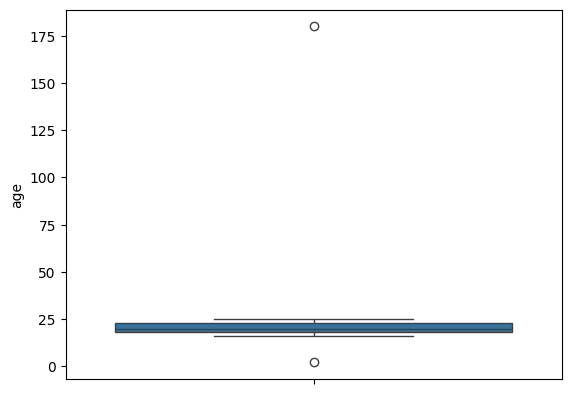

In [36]:
sns.boxplot(data['age'])
plt.show()

In [37]:
# look for outliers in the age column
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  18.0
Q3:  22.75
IQR:  4.75


In [38]:

# print the number of outliers
outliers = data[(data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))]
outliers

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
6,532,Vaishnavi,Jha,919009969408,5.63,4.38,2
27,722,Vaishnavi,Patel,917550452611,9.49,3.29,180


In [20]:
# Column age has a problem

In [16]:
data['age'].mask(data['age'] > Q3 + 1.5 * IQR, data['age'].mode()[0],inplace=True)

C:\Users\manda\AppData\Local\Temp\ipykernel_8092\435780761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].mask(data['age'] > Q3 + 1.5 * IQR, data['age'].mode()[0],inplace=True)


In [17]:
data['age'].mask(data['age'] < Q1 - 1.5 * IQR, data['age'].mode()[0],inplace=True)

C:\Users\manda\AppData\Local\Temp\ipykernel_8092\458188593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].mask(data['age'] < Q1 - 1.5 * IQR, data['age'].mode()[0],inplace=True)


In [39]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [40]:
df_filtered = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

In [41]:
df_filtered


,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.92,5.06,19
1,827,Seema,Singh,919085484267,0.22,2.83,20
2,566,Pooja,Rao,919692747629,4.00,5.78,20
3,431,Vikram,Trivedi,919289900918,3.93,NaN,20
4,688,Rishi,Nair,918510327681,0.34,3.35,22
5,401,Pooja,Bose,918752969300,8.74,7.23,19
7,774,Vaishnavi,Verma,917407265215,8.35,2.51,23
8,942,Nikita,Mehta,917631350107,0.66,0.50,18
9,660,Divya,Devi,919595059601,NaN,9.66,24
10,32,Vaishnavi,Pandey,918922269173,4.02,4.08,17


In [44]:
data

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.92,5.06,19
1,827,Seema,Singh,919085484267,0.22,2.83,20
2,566,Pooja,Rao,919692747629,4.00,5.78,20
3,431,Vikram,Trivedi,919289900918,3.93,NaN,20
4,688,Rishi,Nair,918510327681,0.34,3.35,22
5,401,Pooja,Bose,918752969300,8.74,7.23,19
6,532,Vaishnavi,Jha,919009969408,5.63,4.38,2
7,774,Vaishnavi,Verma,917407265215,8.35,2.51,23
8,942,Nikita,Mehta,917631350107,0.66,0.50,18
9,660,Divya,Devi,919595059601,NaN,9.66,24


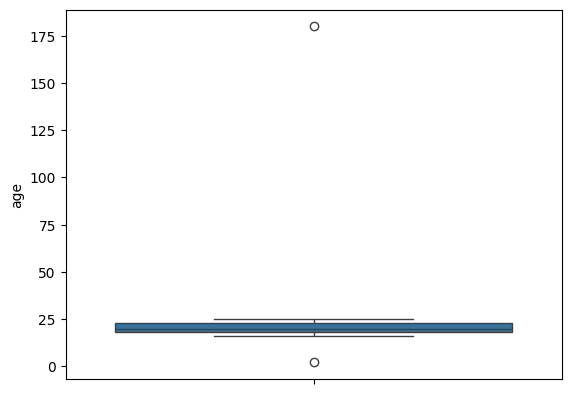

In [43]:
sns.boxplot(data['age'])
plt.show()

In [24]:
import numpy as np
data['age'] = data['age'].apply(lambda x: np.log(x) if x > 0 else 0)

# display the transformed data
print(data['age'])

0     2.944439
1     2.995732
2     2.995732
3     2.995732
4     3.091042
5     2.944439
6     0.693147
7     3.135494
8     2.890372
9     3.178054
10    2.833213
11    2.772589
12    2.944439
13    3.091042
14    3.135494
15    3.044522
16    2.772589
17    3.218876
18    2.772589
19    3.178054
20    2.944439
21    2.890372
22    2.890372
23    3.135494
24    3.091042
25    3.135494
26    2.995732
27    5.192957
28    3.178054
29    2.772589
30    3.135494
31    3.178054
32    3.135494
33    2.890372
34    2.772589
35    2.890372
36    2.772589
37    3.091042
38    3.091042
39    2.944439
40    3.135494
41    2.944439
42    3.091042
43    2.772589
44    2.833213
45    3.091042
46    2.944439
47    2.772589
48    2.772589
49    2.944439
Name: age, dtype: float64


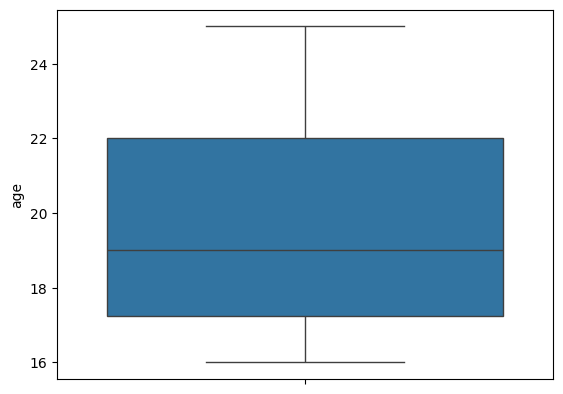

In [19]:

# show age distribution after transformation in boxplot
sns.boxplot(data['age'])
plt.show()

In [45]:
import numpy as np

# Apply square root transformation to the 'age' variable
data['age_sqrt'] = np.sqrt(data['age'])

# Display the transformed data
print(data['age_sqrt'])


0      4.358899
1      4.472136
2      4.472136
3      4.472136
4      4.690416
5      4.358899
6      1.414214
7      4.795832
8      4.242641
9      4.898979
10     4.123106
11     4.000000
12     4.358899
13     4.690416
14     4.795832
15     4.582576
16     4.000000
17     5.000000
18     4.000000
19     4.898979
20     4.358899
21     4.242641
22     4.242641
23     4.795832
24     4.690416
25     4.795832
26     4.472136
27    13.416408
28     4.898979
29     4.000000
30     4.795832
31     4.898979
32     4.795832
33     4.242641
34     4.000000
35     4.242641
36     4.000000
37     4.690416
38     4.690416
39     4.358899
40     4.795832
41     4.358899
42     4.690416
43     4.000000
44     4.123106
45     4.690416
46     4.358899
47     4.000000
48     4.000000
49     4.358899
Name: age_sqrt, dtype: float64


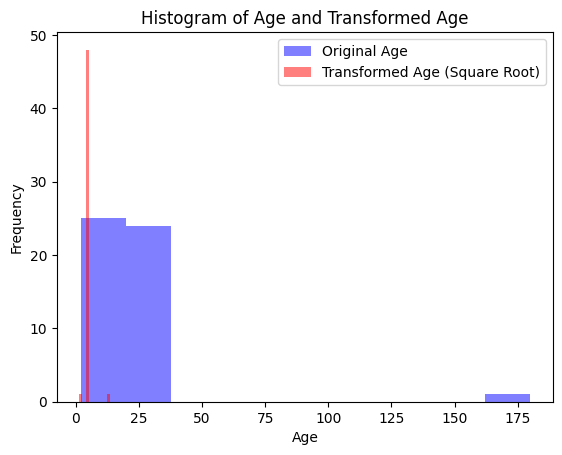

In [46]:
import matplotlib.pyplot as plt

# Plot histogram of original 'age' variable
plt.hist(data['age'], bins=10, color='blue', alpha=0.5, label='Original Age')

# Plot histogram of transformed 'age_sqrt' variable
plt.hist(data['age_sqrt'], bins=10, color='red', alpha=0.5, label='Transformed Age (Square Root)')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age and Transformed Age')
plt.legend()
plt.show()
